In [1]:
import QuantLib as ql

%load_ext autoreload
%autoreload 2
from ust_curve import *

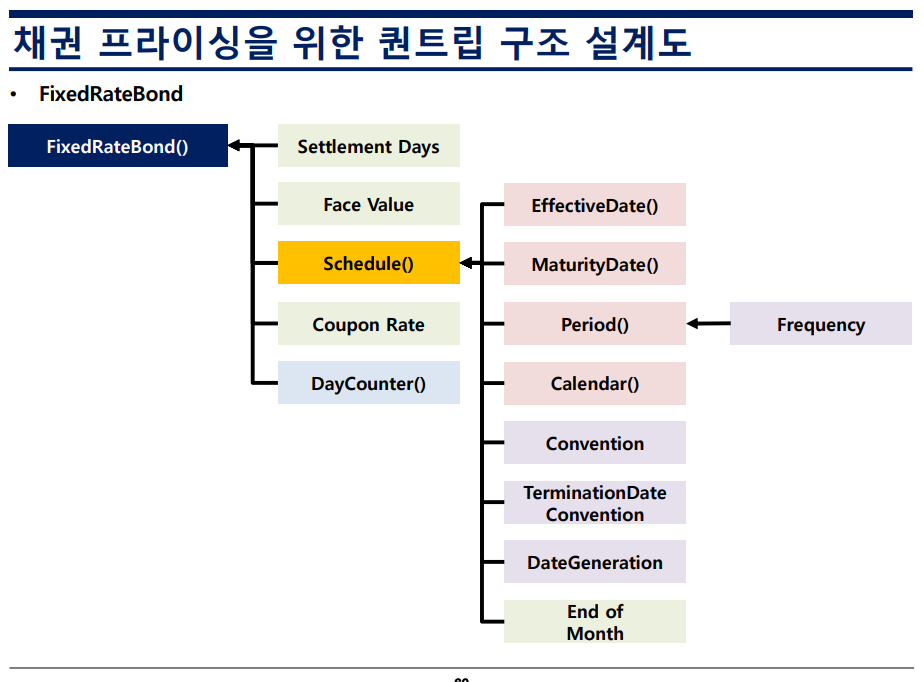

In [6]:
# Basic Setup
eval_date = GET_DATE()
quote = GET_QUOTE(eval_date)
curve = TREASURY_CURVE(eval_date, quote)
# Handle, Engine
curveHandle = ql.YieldTermStructureHandle(curve)
bondEngine = ql.DiscountingBondEngine(curveHandle)



# 고정 금리 채권 Fixed Rate Bond 구조
# Treasury Bond Information
issueDate = ql.Date(13, 11, 2019) #이때 발행된 채권
maturityDate = ql.Date(13, 11, 2029) #10년짜리로 가정
tenor = ql.Period(ql.Semiannual)  #미국국고채는 보통 6개월 단위 지급
calendar = ql.UnitedStates()
convention = ql.ModifiedFollowing
dateGeneration = ql.DateGeneration.Backward
endOfMonth=False
schedule = ql.Schedule(issueDate,
                      maturityDate,
                      tenor,
                      calendar,
                      convention,
                      convention,
                      dateGeneration,
                      endOfMonth)

# 실제 거래 대금을 언제 주고 받을 것인가
# 상품이 언제 인수도가 될 것인가
# 1이라는 의미는 오늘 거래를 했으면 내일 대금이 나간다는 의미 
# 보통 채권은 1
settlementDays = 1
faceAmount = 100
coupon = [0.0175]  #1.75%
dayCount = ql.ActualActual()

# Fixed-rate bond
fixedRateBond = ql.FixedRateBond(settlementDays,
                                faceAmount,
                                schedule,
                                coupon,
                                dayCount)


# Conduct Pricing
fixedRateBond.setPricingEngine(bondEngine)

# print pricing result
clean_price = fixedRateBond.cleanPrice()
accrued_interest = fixedRateBond.accruedAmount()
dirty_price = fixedRateBond.dirtyPrice()  # 클린 + 경과이자
ytm = fixedRateBond.bondYield(dayCount, ql.Compounded, ql.Semiannual)  #만기수익률

print(f"Clean Price = {clean_price}")   # 이 채권의 현재가격
print(f"Accrued Interest = {accrued_interest}")
print(f"Dirty Price = {dirty_price}")
print(f"Yield to Maturity = {ytm}")

# Generate CashFlow Table
for cashflow in fixedRateBond.cashflows():
    print(cashflow.date(), cashflow.amount())
    
# Calculate YTM
# 듀레이션, 컨벡시티 계산하려면 InterestRate 클래스로 변환해줘야함.
new_ytm = ql.InterestRate(fixedRateBond.bondYield(dayCount, ql.Compounded, ql.Semiannual), dayCount, ql.Compounded, ql.Semiannual)

# Duration & Convexity
duration = ql.BondFunctions.duration(fixedRateBond, new_ytm)
convexity = ql.BondFunctions.convexity(fixedRateBond, new_ytm)
print(f"Duration = {duration}")  #금리가 1%에서 2%로 1%상승하면 채권가격이 -8.58만큼 깎인다는 소리
print(f"Convexity = {convexity}")

Clean Price = 105.33591217408635
Accrued Interest = 0.3979452054794442
Dirty Price = 105.73385737956579
Yield to Maturity = 0.010744147455692295
May 13th, 2020 0.8708604685979449
November 13th, 2020 0.8797814207650356
May 13th, 2021 0.8671663298151167
November 15th, 2021 0.8917808219178092
May 13th, 2022 0.8582191780821979
November 14th, 2022 0.886986301369852
May 15th, 2023 0.872602739726025
November 13th, 2023 0.872602739726025
May 13th, 2024 0.8708604685979449
November 13th, 2024 0.8797814207650356
May 13th, 2025 0.8671663298151167
November 13th, 2025 0.8821917808219171
May 13th, 2026 0.86780821917809
November 13th, 2026 0.8821917808219171
May 13th, 2027 0.86780821917809
November 15th, 2027 0.8917808219178092
May 15th, 2028 0.8708342690321169
November 13th, 2028 0.8702185792349715
May 14th, 2029 0.8719608503630516
November 13th, 2029 0.8773972602739821
November 13th, 2029 100.0
Duration = 7.688516000355406
Convexity = 65.63986348999147
